In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
import netCDF4 as nc4


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
os.system('sshfs \
erd561@raijin.nci.org.au:/g/data/e14/erd561/CMIP5/Paul/ \
/Users/earl/Desktop/bamboo')

0

In [4]:
script_name = nb_name[:-6]
print(script_name)
figures_path = '/Users/earl/Dropbox/CMIP5/figures/'

hist_thetao_path = '/Users/earl/Desktop/bamboo/historical/mon/ocean/thetao/latest/'
hist_tauuo_path = '/Users/earl/Desktop/bamboo/historical/mon/ocean/tauuo/latest/'
hist_tauvo_path = '/Users/earl/Desktop/bamboo/historical/mon/ocean/tauvo/latest/'
hist_thetao_list = sorted(os.listdir(hist_thetao_path))
hist_tauuo_list = sorted(os.listdir(hist_tauuo_path))
hist_tauvo_list = sorted(os.listdir(hist_tauvo_path))

rcp85_thetao_path = '/Users/earl/Desktop/bamboo/rcp85/mon/ocean/thetao/latest/'
rcp85_tauuo_path = '/Users/earl/Desktop/bamboo/rcp85/mon/ocean/tauuo/latest/'
rcp85_tauvo_path = '/Users/earl/Desktop/bamboo/rcp85/mon/ocean/tauvo/latest/'
rcp85_thetao_list = sorted(os.listdir(rcp85_thetao_path))
rcp85_tauuo_list = sorted(os.listdir(rcp85_tauuo_path))
rcp85_tauvo_list = sorted(os.listdir(rcp85_tauvo_path))

good_list = []
thetao_hist_good_list = []
for hist_thetao in hist_thetao_list:
    if \
    any(hist_thetao[:-23] in hist_tauuo for hist_tauuo in hist_tauuo_list) and \
    any(hist_thetao[:-28] in hist_tauvo for hist_tauvo in hist_tauvo_list) and \
    any(hist_thetao[:-23] in rcp85_thetao for rcp85_thetao in rcp85_thetao_list) and \
    any(hist_thetao[:-23] in rcp85_tauuo for rcp85_tauuo in rcp85_tauuo_list) and \
    any(hist_thetao[:-28] in rcp85_tauvo for rcp85_tauvo in rcp85_tauvo_list):
        print(hist_thetao[:-24])
        thetao_hist_good_list.append(hist_thetao)
        good_list.append(hist_thetao[:-24])

tauuo_hist_good_list = []
tauvo_hist_good_list = []
thetao_rcp85_good_list = []
tauuo_rcp85_good_list = []
tauvo_rcp85_good_list = []
for good in good_list:
    tauuo_hist_good_list.append([
        hist_tauuo for hist_tauuo in hist_tauuo_list if hist_tauuo[:-23] in good + '_'][0])
    tauvo_hist_good_list.append([
        hist_tauvo for hist_tauvo in hist_tauvo_list if hist_tauvo[:-23] in good + '_'][0])
    thetao_rcp85_good_list.append(
        [rcp85_thetao for rcp85_thetao in rcp85_thetao_list if rcp85_thetao[:-23] in good + '_'][0])
    tauuo_rcp85_good_list.append(
        [rcp85_tauuo for rcp85_tauuo in rcp85_tauuo_list if rcp85_tauuo[:-23] in good + '_'][0])
    tauvo_rcp85_good_list.append(
        [rcp85_tauvo for rcp85_tauvo in rcp85_tauvo_list if rcp85_tauvo[:-23] in good + '_'][0])
print(tauuo_hist_good_list)



q01_make_MMM_thetao_tauuotauvo_CMIP5
ACCESS1-0
ACCESS1-3
CMCC-CMS
CMCC-CM
CNRM-CM5
CSIRO-Mk3-6-0
CanESM2
FGOALS-s2
GFDL-CM3
GFDL-ESM2G
GFDL-ESM2M
HadGEM2-AO
IPSL-CM5A-LR
IPSL-CM5A-MR
IPSL-CM5B-LR
MIROC-ESM-CHEM
MIROC-ESM
MPI-ESM-MR
MRI-CGCM3
MRI-ESM1
NorESM1-M
['ACCESS1-0_r1i1p1_1980-1999mean.nc', 'ACCESS1-3_r1i1p1_1980-1999mean.nc', 'CMCC-CMS_r1i1p1_1980-1999mean.nc', 'CMCC-CM_r1i1p1_1980-1999mean.nc', 'CNRM-CM5_r1i1p1_1980-1999mean.nc', 'CSIRO-Mk3-6-0_r1i1p1_1980-1999mean.nc', 'CanESM2_r1i1p1_1980-1999mean.nc', 'FGOALS-s2_r1i1p1_1980-1999mean.nc', 'GFDL-CM3_r1i1p1_1980-1999mean.nc', 'GFDL-ESM2G_r1i1p1_1980-1999mean.nc', 'GFDL-ESM2M_r1i1p1_1980-1999mean.nc', 'HadGEM2-AO_r1i1p1_1980-1999mean.nc', 'IPSL-CM5A-LR_r1i1p1_1980-1999mean.nc', 'IPSL-CM5A-MR_r1i1p1_1980-1999mean.nc', 'IPSL-CM5B-LR_r1i1p1_1980-1999mean.nc', 'MIROC-ESM-CHEM_r1i1p1_1980-1999mean.nc', 'MIROC-ESM_r1i1p1_1980-1999mean.nc', 'MPI-ESM-MR_r1i1p1_1980-1999mean.nc', 'MRI-CGCM3_r1i1p1_1980-1999mean.nc', 'MRI-ESM1_r1i1p1_198

In [5]:
thetao_hist = {}
thetao_rcp85 = {}
thetao_anom = {}
thetao_lat = {}
thetao_lon = {}
thetao_lev = {}

tauuo_hist = {}
tauuo_rcp85 = {}
tauuo_anom = {}
tauuo_lat = {}
tauuo_lon = {}

tauvo_hist = {}
tauvo_rcp85 = {}
tauvo_anom = {}
tauvo_lat = {}
tauvo_lon = {}

print(tauuo_hist_good_list)
for model in good_list:
    print(model)
    # These models are hard to deal with:
    # MIROC5 and inmcm4 have a crazy rotated grid
    # MPI-ESM-LR has a weird grid too
    if model in ['MIROC5', 'MPI-ESM-LR', 'inmcm4']:
        continue
        
    if model in ['CESM1-WACCM']:
        r = '2'
    else:
        r = '1'
    thetao_rcp85_data = xr.open_dataset(
        rcp85_thetao_path + model + '_r' + r + 'i1p1_2080-2099mean.nc', decode_times=False)
    tauuo_rcp85_data = xr.open_dataset(
        rcp85_tauuo_path + model + '_r' + r + 'i1p1_2080-2099mean.nc', decode_times=False)
    tauvo_rcp85_data = xr.open_dataset(
        rcp85_tauvo_path + model + '_r' + r + 'i1p1_2080-2099mean.nc', decode_times=False)
    
    if model in ['CESM1-WACCM']:
        r = '1'
    else:
        r = '1'
    thetao_hist_data = xr.open_dataset(
        hist_thetao_path + model + '_r' + r + 'i1p1_1980-1999mean.nc', decode_times=False)
    
    if model in ['EC-EARTH']:
        r = '2'
    tauuo_hist_data = xr.open_dataset(
        hist_tauuo_path + model + '_r' + r + 'i1p1_1980-1999mean.nc', decode_times=False)
    tauvo_hist_data = xr.open_dataset(
        hist_tauvo_path + model + '_r' + r + 'i1p1_1980-1999mean.nc', decode_times=False)
    
    thetao_hist[model] = thetao_hist_data['thetao'][0,:,:,:]
    thetao_rcp85[model] = thetao_rcp85_data['thetao'][0,:,:,:]
    tauuo_hist[model] = tauuo_hist_data['tauuo'][0,:,:]
    tauuo_rcp85[model] = tauuo_rcp85_data['tauuo'][0,:,:]
    tauvo_hist[model] = tauvo_hist_data['tauvo'][0,:,:]
    tauvo_rcp85[model] = tauvo_rcp85_data['tauvo'][0,:,:]
    
    thetao_lev[model] = thetao_hist_data['lev'][:]
    
    if len(thetao_hist_data['lat'].shape) is 2:
        # MPI-ESM-LR and MPI-ESM-MR longitude index should be taken from the end
        if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
            thetao_lat[model] = thetao_hist_data['lat'][:,0]
            thetao_lon[model] = thetao_hist_data['lon'][-1,:]
        else:
            thetao_lat[model] = thetao_hist_data['lat'][:,0]
            thetao_lon[model] = thetao_hist_data['lon'][0,:]
    else:
        thetao_lat[model] = thetao_hist_data['lat'][:]
        thetao_lon[model] = thetao_hist_data['lon'][:]
        
    if len(tauuo_hist_data['lat'].shape) is 2:
        # MPI-ESM-LR and MPI-ESM-MR longitude index should be taken from the end
        if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
            tauuo_lat[model] = tauuo_hist_data['lat'][:,0]
            tauuo_lon[model] = tauuo_hist_data['lon'][-1,:]
            tauvo_lat[model] = tauvo_hist_data['lat'][:,0]
            tauvo_lon[model] = tauvo_hist_data['lon'][-1,:]
        else:
            tauuo_lat[model] = tauuo_hist_data['lat'][:,0]
            tauuo_lon[model] = tauuo_hist_data['lon'][0,:]
            tauvo_lat[model] = tauvo_hist_data['lat'][:,0]
            tauvo_lon[model] = tauvo_hist_data['lon'][0,:]
    else:
        tauuo_lat[model] = tauuo_hist_data['lat'][:]
        tauuo_lon[model] = tauuo_hist_data['lon'][:]
        tauvo_lat[model] = tauvo_hist_data['lat'][:]
        tauvo_lon[model] = tauvo_hist_data['lon'][:]
    
    # The GFDL models run need this lon offset fix ...
    if model in ['GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M']:
        thetao_lon[model][:280] += 360
        tauuo_lon[model][:280] += 360            
        tauvo_lon[model][:280] += 360
    
    # HadGEM2-AO lev axis needs to be flipped...
    if model in ['HadGEM2-AO']:
        thetao_hist_now = thetao_hist[model]
        thetao_hist[model] = np.flipud(thetao_hist_now)
        thetao_rcp85_now = thetao_rcp85[model]
        thetao_rcp85[model] = np.flipud(thetao_rcp85_now)
        
        thetao_lev_now = thetao_lev[model]
        thetao_lev[model] = np.flipud(thetao_lev_now)
    
    # Also, MPI-ESM-LR and MPI-ESM-MR are flipped upside down...
    # Couldn't find a flip function in xarray...
    if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
        thetao_hist_now = thetao_hist[model]
        thetao_hist[model] = np.fliplr(thetao_hist_now)
        thetao_rcp85_now = thetao_rcp85[model]
        thetao_rcp85[model] = np.fliplr(thetao_rcp85_now)
        tauuo_hist_now = tauuo_hist[model]
        tauuo_hist[model] = np.flipud(tauuo_hist_now)
        tauuo_rcp85_now = tauuo_rcp85[model]
        tauuo_rcp85[model] = np.flipud(tauuo_rcp85_now)
        tauvo_hist_now = tauvo_hist[model]
        tauvo_hist[model] = np.flipud(tauvo_hist_now)
        tauvo_rcp85_now = tauvo_rcp85[model]
        tauvo_rcp85[model] = np.flipud(tauvo_rcp85_now)
        
        thetao_lat_now = thetao_lat[model]
        thetao_lat[model] = np.flipud(thetao_lat_now)
        tauuo_lat_now = tauuo_lat[model]
        tauuo_lat[model] = np.flipud(tauuo_lat_now)
        tauvo_lat_now = tauvo_lat[model]
        tauvo_lat[model] = np.flipud(tauvo_lat_now)
        
    # HadGEM2-AO, MRI-CGCM3 and MRI-ESM1 need to have their wind stress land masked...
    if model in ['HadGEM2-AO', 'MRI-CGCM3', 'MRI-ESM1', 'EC-EARTH']:
        # anything that satisfies the condition is SAFE
        tauuo_hist[model] = tauuo_hist[model].where((tauuo_hist[model] != 0), np.nan)
        tauuo_rcp85[model] = tauuo_rcp85[model].where((tauuo_rcp85[model] != 0), np.nan)
        tauvo_hist[model] = tauvo_hist[model].where((tauvo_hist[model] != 0), np.nan)
        tauvo_rcp85[model] = tauvo_rcp85[model].where((tauvo_rcp85[model] != 0), np.nan)
    
    # MRI-CGCM3 and MRI-ESM1 need to have their SST land masked...
    if model in ['MRI-CGCM3', 'MRI-ESM1', 'EC-EARTH']:
        thetao_hist[model] = thetao_hist[model].where((thetao_hist[model] != 0), np.nan)
        thetao_rcp85[model] = thetao_rcp85[model].where((thetao_rcp85[model] != 0), np.nan)
        
    print(model + ' OK!')
        
print(len(good_list))   

['ACCESS1-0_r1i1p1_1980-1999mean.nc', 'ACCESS1-3_r1i1p1_1980-1999mean.nc', 'CMCC-CMS_r1i1p1_1980-1999mean.nc', 'CMCC-CM_r1i1p1_1980-1999mean.nc', 'CNRM-CM5_r1i1p1_1980-1999mean.nc', 'CSIRO-Mk3-6-0_r1i1p1_1980-1999mean.nc', 'CanESM2_r1i1p1_1980-1999mean.nc', 'FGOALS-s2_r1i1p1_1980-1999mean.nc', 'GFDL-CM3_r1i1p1_1980-1999mean.nc', 'GFDL-ESM2G_r1i1p1_1980-1999mean.nc', 'GFDL-ESM2M_r1i1p1_1980-1999mean.nc', 'HadGEM2-AO_r1i1p1_1980-1999mean.nc', 'IPSL-CM5A-LR_r1i1p1_1980-1999mean.nc', 'IPSL-CM5A-MR_r1i1p1_1980-1999mean.nc', 'IPSL-CM5B-LR_r1i1p1_1980-1999mean.nc', 'MIROC-ESM-CHEM_r1i1p1_1980-1999mean.nc', 'MIROC-ESM_r1i1p1_1980-1999mean.nc', 'MPI-ESM-MR_r1i1p1_1980-1999mean.nc', 'MRI-CGCM3_r1i1p1_1980-1999mean.nc', 'MRI-ESM1_r1i1p1_1980-1999mean.nc', 'NorESM1-M_r1i1p1_1980-1999mean.nc']
ACCESS1-0
ACCESS1-0 OK!
ACCESS1-3
ACCESS1-3 OK!
CMCC-CMS
CMCC-CMS OK!
CMCC-CM
CMCC-CM OK!
CNRM-CM5
CNRM-CM5 OK!
CSIRO-Mk3-6-0
CSIRO-Mk3-6-0 OK!
CanESM2
CanESM2 OK!
FGOALS-s2
FGOALS-s2 OK!
GFDL-CM3
GFDL-CM3 OK

/Users/earl/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<xarray.DataArray 'lev' (lev: 44)>
array([  2.500000e+00,   7.500000e+00,   1.250000e+01,   1.750000e+01,
         2.250000e+01,   2.750000e+01,   3.375000e+01,   4.125000e+01,
         5.000000e+01,   6.000000e+01,   7.000000e+01,   8.000000e+01,
         9.250000e+01,   1.100000e+02,   1.325000e+02,   1.575000e+02,
         1.850000e+02,   2.250000e+02,   2.875000e+02,   3.625000e+02,
         4.500000e+02,   5.500000e+02,   6.750000e+02,   8.250000e+02,
         9.750000e+02,   1.125000e+03,   1.300000e+03,   1.525000e+03,
         1.775000e+03,   2.025000e+03,   2.275000e+03,   2.525000e+03,
         2.775000e+03,   3.025000e+03,   3.275000e+03,   3.525000e+03,
         3.775000e+03,   4.025000e+03,   4.275000e+03,   4.525000e+03,
         4.775000e+03,   5.025000e+03,   5.275000e+03,   5.450000e+03])
Coordinates:
  * lev      (lev) float64 2.5 7.5 12.5 17.5 22.5 27.5 33.75 41.25 50.0 60.0 ...
Attributes:
    bounds:         lev_bnds
    axis:           Z
    long_name:      ocean 

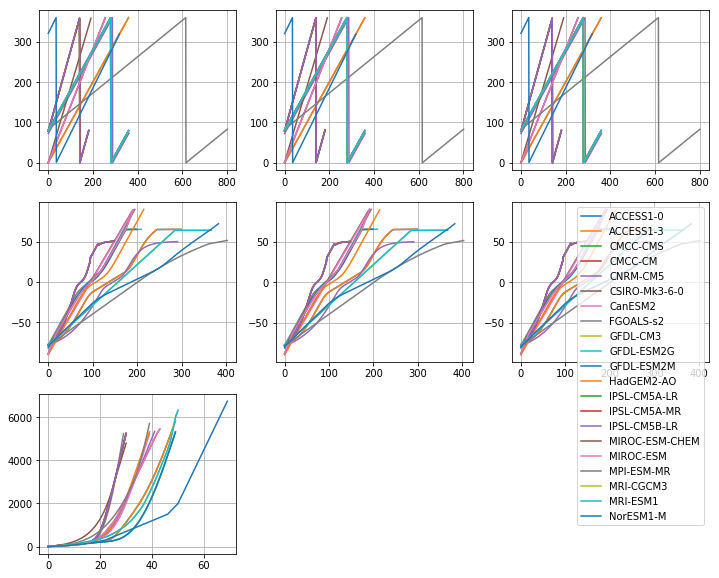

In [6]:
fig = plt.figure() 
fig.set_size_inches(12, 10)

for f in good_list:
    plt.subplot(3,3,1)
    plt.plot(thetao_lon[f])
    plt.grid()
    
    plt.subplot(3,3,2)
    plt.plot(tauuo_lon[f])
    plt.grid()

    plt.subplot(3,3,3)
    plt.plot(tauvo_lon[f])
    plt.grid()

    plt.subplot(3,3,4)
    plt.plot(thetao_lat[f])
    plt.grid()
    
    plt.subplot(3,3,5)
    plt.plot(tauuo_lat[f])
    plt.grid()

    plt.subplot(3,3,6)
    plt.plot(tauvo_lat[f])
    plt.grid()
    plt.legend(good_list)

    plt.subplot(3,3,7)
    plt.plot(thetao_lev[f])
    plt.grid()

print(thetao_lev['MIROC-ESM'])

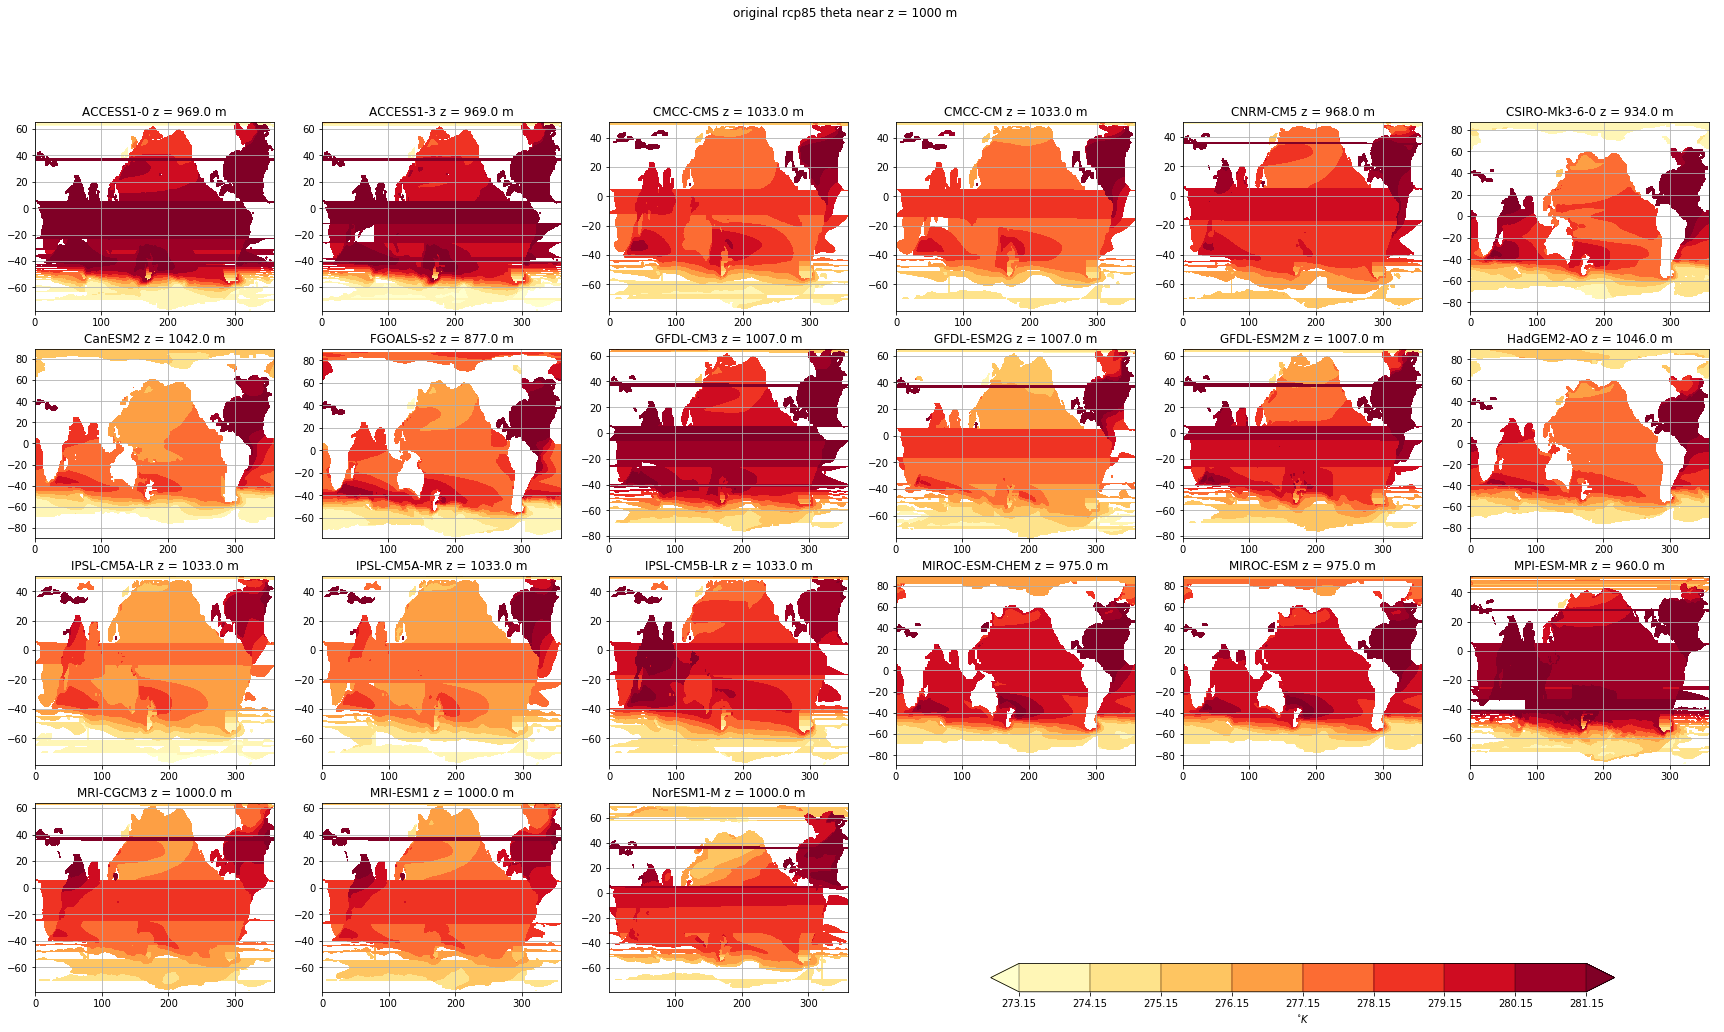

In [15]:
fig = plt.figure() 
fig.set_size_inches(30, 16)

cmap = plt.get_cmap('YlOrRd')
step = 1
contf_lvls = np.arange(0+273.15,8+273.15+1e-08,step)
lev_plot = 1000

for idx,f in enumerate(good_list):
    plt.subplot(4,6,idx+1)
    lev_idx = find_nearest_index(thetao_lev[f], lev_plot)
    contf = plt.contourf(thetao_lon[f], thetao_lat[f],
        thetao_rcp85[f][lev_idx,:,:], contf_lvls, cmap=cmap, extend='both')
    plt.title(f + ' z = ' + str(np.round(np.array(thetao_lev[f][lev_idx]))) + ' m' )
    plt.grid()
ax = plt.subplot2grid((4, 6), (3, 3), colspan=3)
cbar = plt.colorbar(contf, orientation='horizontal', drawedges=True)
cbar.set_label(r'$^{\circ}K$') 
# cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])
plt.axis('off')

plt.suptitle('original rcp85 theta near z = ' + str(lev_plot) + ' m')

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig2_' + '.png', bbox_inches='tight', dpi=300)

In [8]:
lat_N = -30
lat_S = -90
lon_W = 0
lon_E = 360
lon_unique = np.arange(lon_W,lon_E)
lat_unique = np.arange(lat_S,lat_N)
grid_lon_unique, grid_lat_unique = np.meshgrid(lon_unique,lat_unique)
print(np.shape(grid_lon_unique))
tauuo_anom_unique = []
tauvo_anom_unique = []
for idx, t in enumerate(good_list):
    print(t)
    tauuo_lat_N_idx = find_nearest_index(tauuo_lat[t], lat_N)
    tauuo_lat_S_idx = find_nearest_index(tauuo_lat[t], lat_S)
    tauuo_grid_lon_now, tauuo_grid_lat_now = np.meshgrid(
        tauuo_lon[t], 
        tauuo_lat[t][tauuo_lat_S_idx:tauuo_lat_N_idx])
    tauuo_lon_flat = np.transpose(tauuo_grid_lon_now.flatten('F'))
    tauuo_lat_flat = tauuo_grid_lat_now.flatten('F')
    tauuo_flat_list = [tauuo_lon_flat, tauuo_lat_flat]    
    tauuo_grid_points = np.transpose(tauuo_flat_list)
    tauuo_hist_now = tauuo_hist[t][tauuo_lat_S_idx:tauuo_lat_N_idx,:]
    tauuo_rcp85_now = tauuo_rcp85[t][tauuo_lat_S_idx:tauuo_lat_N_idx,:]
    
    tauvo_lat_N_idx = find_nearest_index(tauvo_lat[t], lat_N)
    tauvo_lat_S_idx = find_nearest_index(tauvo_lat[t], lat_S)
    tauvo_grid_lon_now, tauvo_grid_lat_now = np.meshgrid(
        tauvo_lon[t], 
        tauvo_lat[t][tauvo_lat_S_idx:tauvo_lat_N_idx])
    tauvo_lon_flat = np.transpose(tauvo_grid_lon_now.flatten('F'))
    tauvo_lat_flat = tauvo_grid_lat_now.flatten('F')
    tauvo_flat_list = [tauvo_lon_flat, tauvo_lat_flat]    
    tauvo_grid_points = np.transpose(tauvo_flat_list)
    tauvo_hist_now = tauvo_hist[t][tauvo_lat_S_idx:tauvo_lat_N_idx,:]
    tauvo_rcp85_now = tauvo_rcp85[t][tauvo_lat_S_idx:tauvo_lat_N_idx,:]

    if t in ['CSIRO-Mk3-6-0', 'CanESM2', 'FGOALS-s2', 'HadGEM2-AO', 'MIROC-ESM-CHEM', 'MIROC-ESM']:
        tauuo_hist_now_flatten = tauuo_hist_now.stack(z=('lon', 'lat'))
        tauvo_hist_now_flatten = tauvo_hist_now.stack(z=('lon', 'lat'))
        tauuo_rcp85_now_flatten = tauuo_rcp85_now.stack(z=('lon', 'lat'))
        tauvo_rcp85_now_flatten = tauvo_rcp85_now.stack(z=('lon', 'lat'))
    elif t in ['GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'MRI-CGCM3', 'MRI-ESM1']:
        tauuo_hist_now_flatten = tauuo_hist_now.stack(z=('rlon', 'rlat'))
        tauvo_hist_now_flatten = tauvo_hist_now.stack(z=('rlon', 'rlat'))
        tauuo_rcp85_now_flatten = tauuo_rcp85_now.stack(z=('rlon', 'rlat'))
        tauvo_rcp85_now_flatten = tauvo_rcp85_now.stack(z=('rlon', 'rlat'))
    elif t in ['MPI-ESM-MR']:
        tauuo_hist_now_flatten = tauuo_hist_now.flatten('F')
        tauvo_hist_now_flatten = tauvo_hist_now.flatten('F')
        tauuo_rcp85_now_flatten = tauuo_rcp85_now.flatten('F')
        tauvo_rcp85_now_flatten = tauvo_rcp85_now.flatten('F')
    else:
        tauuo_hist_now_flatten = tauuo_hist_now.stack(z=('i', 'j'))
        tauvo_hist_now_flatten = tauvo_hist_now.stack(z=('i', 'j'))
        tauuo_rcp85_now_flatten = tauuo_rcp85_now.stack(z=('i', 'j'))
        tauvo_rcp85_now_flatten = tauvo_rcp85_now.stack(z=('i', 'j'))
        
    tauuo_hist_interp = interpolate.griddata(tauuo_grid_points, tauuo_hist_now_flatten, 
                                           (grid_lon_unique, grid_lat_unique), 
                                           method='linear')
    tauuo_rcp85_interp = interpolate.griddata(tauuo_grid_points, tauuo_rcp85_now_flatten, 
                                           (grid_lon_unique, grid_lat_unique), 
                                           method='linear')
    tauvo_hist_interp = interpolate.griddata(tauvo_grid_points, tauvo_hist_now_flatten, 
                                           (grid_lon_unique, grid_lat_unique), 
                                           method='linear')
    tauvo_rcp85_interp = interpolate.griddata(tauvo_grid_points, tauvo_rcp85_now_flatten, 
                                           (grid_lon_unique, grid_lat_unique), 
                                           method='linear')
    
    if idx == 0:
        tauuo_hist_unique = tauuo_hist_interp
        tauuo_rcp85_unique = tauuo_rcp85_interp
        tauvo_hist_unique = tauvo_hist_interp
        tauvo_rcp85_unique = tauvo_rcp85_interp
    else:
        tauuo_hist_unique = np.dstack((tauuo_hist_unique, tauuo_hist_interp)) 
        tauuo_rcp85_unique = np.dstack((tauuo_rcp85_unique, tauuo_rcp85_interp)) 
        tauvo_hist_unique = np.dstack((tauvo_hist_unique, tauvo_hist_interp)) 
        tauvo_rcp85_unique = np.dstack((tauvo_rcp85_unique, tauvo_rcp85_interp)) 

print(np.shape(tauuo_hist_unique))


(60, 360)
ACCESS1-0
ACCESS1-3
CMCC-CMS
CMCC-CM
CNRM-CM5
CSIRO-Mk3-6-0
CanESM2
FGOALS-s2
GFDL-CM3
GFDL-ESM2G
GFDL-ESM2M
HadGEM2-AO
IPSL-CM5A-LR
IPSL-CM5A-MR
IPSL-CM5B-LR
MIROC-ESM-CHEM
MIROC-ESM
MPI-ESM-MR
MRI-CGCM3
MRI-ESM1
NorESM1-M
(60, 360, 21)


Text(0.5,0.98,'tauuo anom')

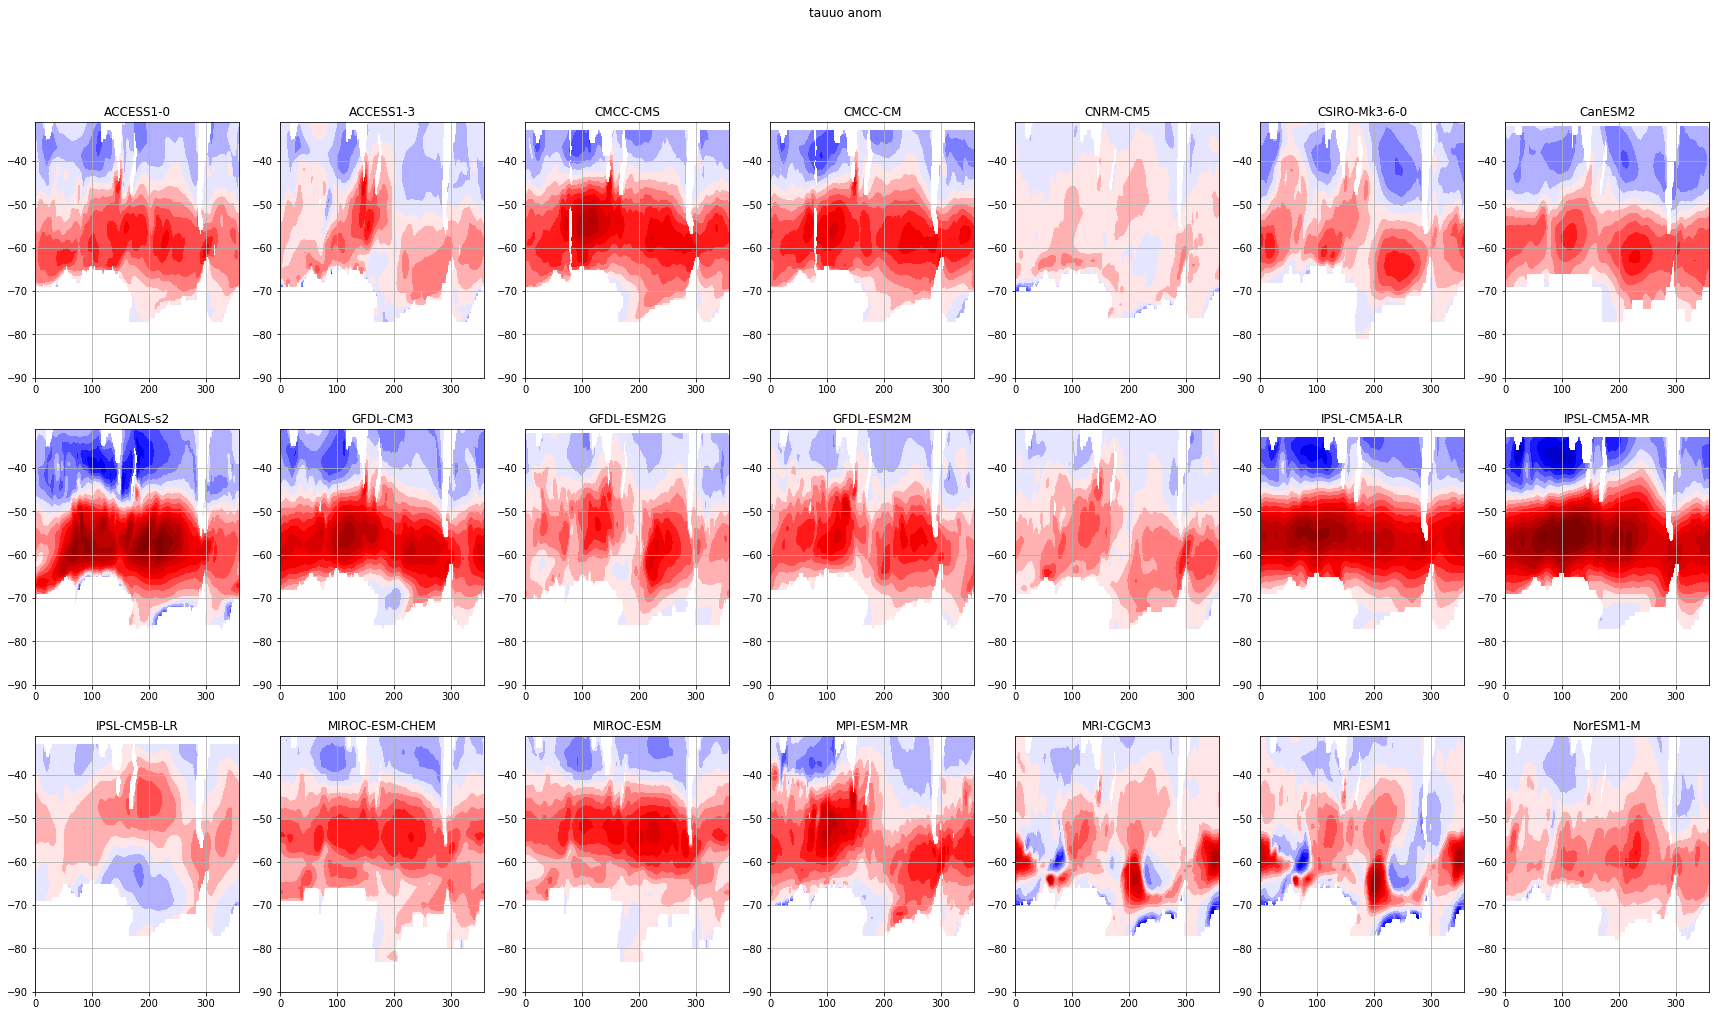

In [9]:
fig = plt.figure() 
fig.set_size_inches(30, 16)

cmap = plt.get_cmap('seismic')
step = 0.01
contf_lvls = np.arange(-0.1,0.1+1e-08,step)

for idx,f in enumerate(good_list):
    plt.subplot(3,7,idx+1)
    plt.contourf(lon_unique,lat_unique,tauuo_rcp85_unique[:,:,idx] - tauuo_hist_unique[:,:,idx], contf_lvls, cmap=cmap, extend='both')
    plt.title(f)
    plt.grid()
plt.suptitle('interpolated tauuo anom')

    

Text(0.5,0.98,'tauvo anom')

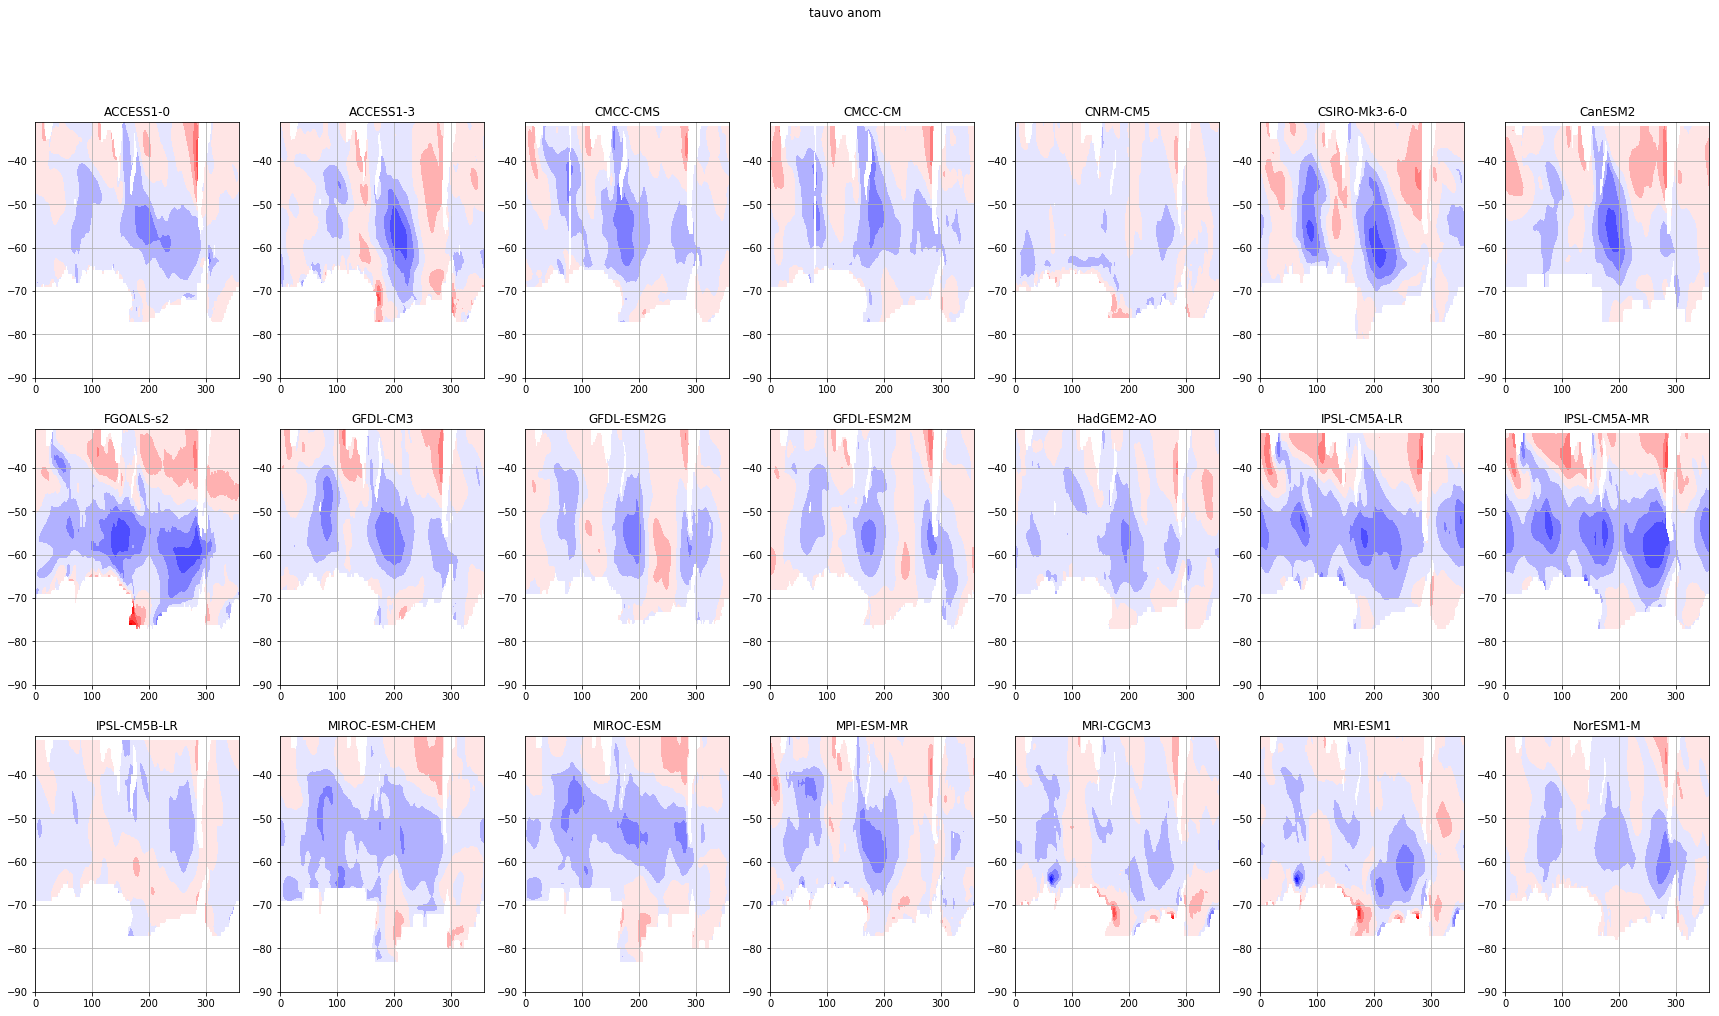

In [10]:
fig = plt.figure() 
fig.set_size_inches(30, 16)

cmap = plt.get_cmap('seismic')
step = 0.01
contf_lvls = np.arange(-0.1,0.1+1e-08,step)

for idx,f in enumerate(good_list):
    plt.subplot(3,7,idx+1)
    plt.contourf(lon_unique,lat_unique,tauvo_rcp85_unique[:,:,idx] - tauvo_hist_unique[:,:,idx], contf_lvls, cmap=cmap, extend='both')
    plt.title(f)
    plt.grid()
plt.suptitle('interpolated tauvo anom')

In [38]:
lat_N = -30
lat_S = -90
lon_W = 0
lon_E = 360
lon_unique = np.arange(lon_W,lon_E)
lat_unique = np.arange(lat_S,lat_N)
lev_unique = thetao_lev['MIROC-ESM']
print(np.shape(lev_unique))
grid_lon_unique, grid_lat_unique = np.meshgrid(lon_unique,lat_unique)
print(np.shape(grid_lon_unique))
thetao_hist_unique = []
thetao_hist_unique_lev = []
thetao_rcp85_unique = []
thetao_rcp85_unique_lev = []
for idx, t in enumerate(good_list):
    for idx_lev, t_lev in enumerate(thetao_lev[t]):
        print(t + ' z = ' + str(np.array(t_lev)))
        thetao_lat_N_idx = find_nearest_index(thetao_lat[t], lat_N)
        thetao_lat_S_idx = find_nearest_index(thetao_lat[t], lat_S)
        thetao_grid_lon_now, thetao_grid_lat_now = np.meshgrid(
            thetao_lon[t], 
            thetao_lat[t][thetao_lat_S_idx:thetao_lat_N_idx])
        thetao_lon_flat = np.transpose(thetao_grid_lon_now.flatten('F'))
        thetao_lat_flat = thetao_grid_lat_now.flatten('F')
        thetao_flat_list = [thetao_lon_flat, thetao_lat_flat]    
        thetao_grid_points = np.transpose(thetao_flat_list)
        thetao_hist_now = thetao_hist[t][idx_lev,thetao_lat_S_idx:thetao_lat_N_idx,:]
        thetao_rcp85_now = thetao_rcp85[t][idx_lev,thetao_lat_S_idx:thetao_lat_N_idx,:]

        if t in ['CSIRO-Mk3-6-0', 'CanESM2', 'FGOALS-s2', 'MIROC-ESM-CHEM', 'MIROC-ESM']:
            thetao_hist_now_flatten = thetao_hist_now.stack(z=('lon', 'lat'))
            thetao_rcp85_now_flatten = thetao_rcp85_now.stack(z=('lon', 'lat'))
        elif t in ['GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'MRI-CGCM3', 'MRI-ESM1']:
            thetao_hist_now_flatten = thetao_hist_now.stack(z=('rlon', 'rlat'))
            thetao_rcp85_now_flatten = thetao_rcp85_now.stack(z=('rlon', 'rlat'))
        elif t in ['MPI-ESM-MR', 'HadGEM2-AO']:
            thetao_hist_now_flatten = thetao_hist_now.flatten('F')
            thetao_rcp85_now_flatten = thetao_rcp85_now.flatten('F')
        else:
            thetao_hist_now_flatten = thetao_hist_now.stack(z=('i', 'j'))
            thetao_rcp85_now_flatten = thetao_rcp85_now.stack(z=('i', 'j'))

        thetao_hist_interp = interpolate.griddata(thetao_grid_points, thetao_hist_now_flatten, 
                                           (grid_lon_unique, grid_lat_unique), 
                                           method='linear')
        thetao_rcp85_interp = interpolate.griddata(thetao_grid_points, thetao_rcp85_now_flatten, 
                                           (grid_lon_unique, grid_lat_unique), 
                                           method='linear')
            
        if idx_lev == 0:
            thetao_hist_unique_lev = thetao_hist_interp
            thetao_rcp85_unique_lev = thetao_rcp85_interp
        else:
            thetao_hist_unique_lev = np.dstack((thetao_hist_unique_lev, thetao_hist_interp)) 
            thetao_rcp85_unique_lev = np.dstack((thetao_rcp85_unique_lev, thetao_rcp85_interp)) 
    
    print(np.shape(thetao_hist_unique_lev))
    
    thetao_hist_interp_stacked = []
    thetao_rcp85_interp_stacked = []
    for idx_lat, t_lat in enumerate(lat_unique):
        print(t + ' lat = ' + str(t_lat))
        for idx_lon, t_lon in enumerate(lon_unique):
            thetao_hist_interp_now = interpolate.griddata(thetao_lev[t], 
                                                          thetao_hist_unique_lev[idx_lat, idx_lon, :],
                                                          lev_unique,
                                                          method='linear')
            thetao_hist_interp_stacked.append(thetao_hist_interp_now)
            
            thetao_rcp85_interp_now = interpolate.griddata(thetao_lev[t], 
                                                          thetao_rcp85_unique_lev[idx_lat, idx_lon, :],
                                                          lev_unique,
                                                          method='linear')
            thetao_rcp85_interp_stacked.append(thetao_rcp85_interp_now)
    
    thetao_hist_interp = np.reshape(thetao_hist_interp_stacked, 
                                    (len(lat_unique), len(lon_unique), len(lev_unique)))
    thetao_rcp85_interp = np.reshape(thetao_rcp85_interp_stacked, 
                                    (len(lat_unique), len(lon_unique), len(lev_unique)))
    print(np.shape(thetao_hist_interp))
    
    if idx == 0:
        thetao_hist_unique = thetao_hist_interp
        thetao_rcp85_unique = thetao_rcp85_interp
    elif idx == 1:
        thetao_hist_unique = np.stack((thetao_hist_unique, thetao_hist_interp), axis=3)
        thetao_rcp85_unique = np.stack((thetao_rcp85_unique, thetao_rcp85_interp), axis=3)
    else:
        thetao_hist_unique = np.concatenate(
            (thetao_hist_unique, np.expand_dims(thetao_hist_interp, axis=3)), axis=3)
        thetao_rcp85_unique = np.concatenate(
            (thetao_rcp85_unique, np.expand_dims(thetao_rcp85_interp, axis=3)), axis=3)
    print(np.shape(thetao_hist_unique))


(44,)
(60, 360)
ACCESS1-0 z = 5.0
ACCESS1-0 z = 15.0
ACCESS1-0 z = 25.0
ACCESS1-0 z = 35.0
ACCESS1-0 z = 45.0
ACCESS1-0 z = 55.0
ACCESS1-0 z = 65.0
ACCESS1-0 z = 75.0
ACCESS1-0 z = 85.0
ACCESS1-0 z = 95.0
ACCESS1-0 z = 105.0
ACCESS1-0 z = 115.0
ACCESS1-0 z = 125.0
ACCESS1-0 z = 135.0
ACCESS1-0 z = 145.0
ACCESS1-0 z = 155.0
ACCESS1-0 z = 165.0
ACCESS1-0 z = 175.0
ACCESS1-0 z = 185.0
ACCESS1-0 z = 195.0
ACCESS1-0 z = 205.0
ACCESS1-0 z = 216.8467559814453
ACCESS1-0 z = 241.34901428222656
ACCESS1-0 z = 280.7807312011719
ACCESS1-0 z = 343.2504577636719
ACCESS1-0 z = 427.3155517578125
ACCESS1-0 z = 536.7156372070312
ACCESS1-0 z = 665.4141235351562
ACCESS1-0 z = 812.7816162109375
ACCESS1-0 z = 969.0651245117188
ACCESS1-0 z = 1130.9349365234375
ACCESS1-0 z = 1289.6046142578125
ACCESS1-0 z = 1455.7701416015625
ACCESS1-0 z = 1622.9256591796875
ACCESS1-0 z = 1801.55810546875
ACCESS1-0 z = 1984.8546142578125
ACCESS1-0 z = 2182.90478515625
ACCESS1-0 z = 2388.41748046875
ACCESS1-0 z = 2610.935058593

CMCC-CM z = 5250.2266127632065
(60, 360, 31)
CMCC-CM lat = -90
CMCC-CM lat = -89
CMCC-CM lat = -88
CMCC-CM lat = -87
CMCC-CM lat = -86
CMCC-CM lat = -85
CMCC-CM lat = -84
CMCC-CM lat = -83
CMCC-CM lat = -82
CMCC-CM lat = -81
CMCC-CM lat = -80
CMCC-CM lat = -79
CMCC-CM lat = -78
CMCC-CM lat = -77
CMCC-CM lat = -76
CMCC-CM lat = -75
CMCC-CM lat = -74
CMCC-CM lat = -73
CMCC-CM lat = -72
CMCC-CM lat = -71
CMCC-CM lat = -70
CMCC-CM lat = -69
CMCC-CM lat = -68
CMCC-CM lat = -67
CMCC-CM lat = -66
CMCC-CM lat = -65
CMCC-CM lat = -64
CMCC-CM lat = -63
CMCC-CM lat = -62
CMCC-CM lat = -61
CMCC-CM lat = -60
CMCC-CM lat = -59
CMCC-CM lat = -58
CMCC-CM lat = -57
CMCC-CM lat = -56
CMCC-CM lat = -55
CMCC-CM lat = -54
CMCC-CM lat = -53
CMCC-CM lat = -52
CMCC-CM lat = -51
CMCC-CM lat = -50
CMCC-CM lat = -49
CMCC-CM lat = -48
CMCC-CM lat = -47
CMCC-CM lat = -46
CMCC-CM lat = -45
CMCC-CM lat = -44
CMCC-CM lat = -43
CMCC-CM lat = -42
CMCC-CM lat = -41
CMCC-CM lat = -40
CMCC-CM lat = -39
CMCC-CM lat = -38
C

CanESM2 lat = -37
CanESM2 lat = -36
CanESM2 lat = -35
CanESM2 lat = -34
CanESM2 lat = -33
CanESM2 lat = -32
CanESM2 lat = -31
(60, 360, 44)
(60, 360, 44, 7)
FGOALS-s2 z = 5.0
FGOALS-s2 z = 15.0
FGOALS-s2 z = 25.0
FGOALS-s2 z = 35.0
FGOALS-s2 z = 45.0
FGOALS-s2 z = 55.0
FGOALS-s2 z = 65.0
FGOALS-s2 z = 75.0
FGOALS-s2 z = 85.0
FGOALS-s2 z = 95.0
FGOALS-s2 z = 105.0
FGOALS-s2 z = 115.0
FGOALS-s2 z = 125.0
FGOALS-s2 z = 135.0
FGOALS-s2 z = 145.0
FGOALS-s2 z = 156.9302978515625
FGOALS-s2 z = 178.42770385742188
FGOALS-s2 z = 222.50180053710938
FGOALS-s2 z = 303.1057434082031
FGOALS-s2 z = 432.59613037109375
FGOALS-s2 z = 621.193115234375
FGOALS-s2 z = 876.5333862304688
FGOALS-s2 z = 1203.3367919921875
FGOALS-s2 z = 1603.199951171875
FGOALS-s2 z = 2074.5263671875
FGOALS-s2 z = 2612.59619140625
FGOALS-s2 z = 3209.7724609375
FGOALS-s2 z = 3855.835205078125
FGOALS-s2 z = 4538.427734375
FGOALS-s2 z = 5243.5966796875
(60, 360, 30)
FGOALS-s2 lat = -90
FGOALS-s2 lat = -89
FGOALS-s2 lat = -88
FGOALS-

GFDL-ESM2M z = 2048.82861328125
GFDL-ESM2M z = 2314.879150390625
GFDL-ESM2M z = 2598.456298828125
GFDL-ESM2M z = 2898.365234375
GFDL-ESM2M z = 3213.205810546875
GFDL-ESM2M z = 3541.389892578125
GFDL-ESM2M z = 3881.162109375
GFDL-ESM2M z = 4230.62060546875
GFDL-ESM2M z = 4587.74267578125
GFDL-ESM2M z = 4950.40869140625
GFDL-ESM2M z = 5316.4287109375
(60, 360, 50)
GFDL-ESM2M lat = -90
GFDL-ESM2M lat = -89
GFDL-ESM2M lat = -88
GFDL-ESM2M lat = -87
GFDL-ESM2M lat = -86
GFDL-ESM2M lat = -85
GFDL-ESM2M lat = -84
GFDL-ESM2M lat = -83
GFDL-ESM2M lat = -82
GFDL-ESM2M lat = -81
GFDL-ESM2M lat = -80
GFDL-ESM2M lat = -79
GFDL-ESM2M lat = -78
GFDL-ESM2M lat = -77
GFDL-ESM2M lat = -76
GFDL-ESM2M lat = -75
GFDL-ESM2M lat = -74
GFDL-ESM2M lat = -73
GFDL-ESM2M lat = -72
GFDL-ESM2M lat = -71
GFDL-ESM2M lat = -70
GFDL-ESM2M lat = -69
GFDL-ESM2M lat = -68
GFDL-ESM2M lat = -67
GFDL-ESM2M lat = -66
GFDL-ESM2M lat = -65
GFDL-ESM2M lat = -64
GFDL-ESM2M lat = -63
GFDL-ESM2M lat = -62
GFDL-ESM2M lat = -61
GFDL-

IPSL-CM5A-MR lat = -63
IPSL-CM5A-MR lat = -62
IPSL-CM5A-MR lat = -61
IPSL-CM5A-MR lat = -60
IPSL-CM5A-MR lat = -59
IPSL-CM5A-MR lat = -58
IPSL-CM5A-MR lat = -57
IPSL-CM5A-MR lat = -56
IPSL-CM5A-MR lat = -55
IPSL-CM5A-MR lat = -54
IPSL-CM5A-MR lat = -53
IPSL-CM5A-MR lat = -52
IPSL-CM5A-MR lat = -51
IPSL-CM5A-MR lat = -50
IPSL-CM5A-MR lat = -49
IPSL-CM5A-MR lat = -48
IPSL-CM5A-MR lat = -47
IPSL-CM5A-MR lat = -46
IPSL-CM5A-MR lat = -45
IPSL-CM5A-MR lat = -44
IPSL-CM5A-MR lat = -43
IPSL-CM5A-MR lat = -42
IPSL-CM5A-MR lat = -41
IPSL-CM5A-MR lat = -40
IPSL-CM5A-MR lat = -39
IPSL-CM5A-MR lat = -38
IPSL-CM5A-MR lat = -37
IPSL-CM5A-MR lat = -36
IPSL-CM5A-MR lat = -35
IPSL-CM5A-MR lat = -34
IPSL-CM5A-MR lat = -33
IPSL-CM5A-MR lat = -32
IPSL-CM5A-MR lat = -31
(60, 360, 44)
(60, 360, 44, 14)
IPSL-CM5B-LR z = 4.999938011169434
IPSL-CM5B-LR z = 15.000288009643555
IPSL-CM5B-LR z = 25.001758575439453
IPSL-CM5B-LR z = 35.00541305541992
IPSL-CM5B-LR z = 45.0133171081543
IPSL-CM5B-LR z = 55.0294990539550

MPI-ESM-MR z = 68.5
MPI-ESM-MR z = 82.5
MPI-ESM-MR z = 100.0
MPI-ESM-MR z = 122.5
MPI-ESM-MR z = 150.0
MPI-ESM-MR z = 182.5
MPI-ESM-MR z = 220.0
MPI-ESM-MR z = 262.5
MPI-ESM-MR z = 310.0
MPI-ESM-MR z = 362.5
MPI-ESM-MR z = 420.0
MPI-ESM-MR z = 485.0
MPI-ESM-MR z = 560.0
MPI-ESM-MR z = 645.0
MPI-ESM-MR z = 740.0
MPI-ESM-MR z = 845.0
MPI-ESM-MR z = 960.0
MPI-ESM-MR z = 1085.0
MPI-ESM-MR z = 1220.0
MPI-ESM-MR z = 1365.0
MPI-ESM-MR z = 1525.0
MPI-ESM-MR z = 1700.0
MPI-ESM-MR z = 1885.0
MPI-ESM-MR z = 2080.0
MPI-ESM-MR z = 2290.0
MPI-ESM-MR z = 2525.0
MPI-ESM-MR z = 2785.0
MPI-ESM-MR z = 3070.0
MPI-ESM-MR z = 3395.0
MPI-ESM-MR z = 3770.0
MPI-ESM-MR z = 4195.0
MPI-ESM-MR z = 4670.0
MPI-ESM-MR z = 5170.0
MPI-ESM-MR z = 5720.0
(60, 360, 40)
MPI-ESM-MR lat = -90
MPI-ESM-MR lat = -89
MPI-ESM-MR lat = -88
MPI-ESM-MR lat = -87
MPI-ESM-MR lat = -86
MPI-ESM-MR lat = -85
MPI-ESM-MR lat = -84
MPI-ESM-MR lat = -83
MPI-ESM-MR lat = -82
MPI-ESM-MR lat = -81
MPI-ESM-MR lat = -80
MPI-ESM-MR lat = -79
MPI-E

NorESM1-M lat = -76
NorESM1-M lat = -75
NorESM1-M lat = -74
NorESM1-M lat = -73
NorESM1-M lat = -72
NorESM1-M lat = -71
NorESM1-M lat = -70
NorESM1-M lat = -69
NorESM1-M lat = -68
NorESM1-M lat = -67
NorESM1-M lat = -66
NorESM1-M lat = -65
NorESM1-M lat = -64
NorESM1-M lat = -63
NorESM1-M lat = -62
NorESM1-M lat = -61
NorESM1-M lat = -60
NorESM1-M lat = -59
NorESM1-M lat = -58
NorESM1-M lat = -57
NorESM1-M lat = -56
NorESM1-M lat = -55
NorESM1-M lat = -54
NorESM1-M lat = -53
NorESM1-M lat = -52
NorESM1-M lat = -51
NorESM1-M lat = -50
NorESM1-M lat = -49
NorESM1-M lat = -48
NorESM1-M lat = -47
NorESM1-M lat = -46
NorESM1-M lat = -45
NorESM1-M lat = -44
NorESM1-M lat = -43
NorESM1-M lat = -42
NorESM1-M lat = -41
NorESM1-M lat = -40
NorESM1-M lat = -39
NorESM1-M lat = -38
NorESM1-M lat = -37
NorESM1-M lat = -36
NorESM1-M lat = -35
NorESM1-M lat = -34
NorESM1-M lat = -33
NorESM1-M lat = -32
NorESM1-M lat = -31
(60, 360, 44)
(60, 360, 44, 21)


37


Text(0.5,0.98,'interpolated theta anom AT z = 4025.0 m')

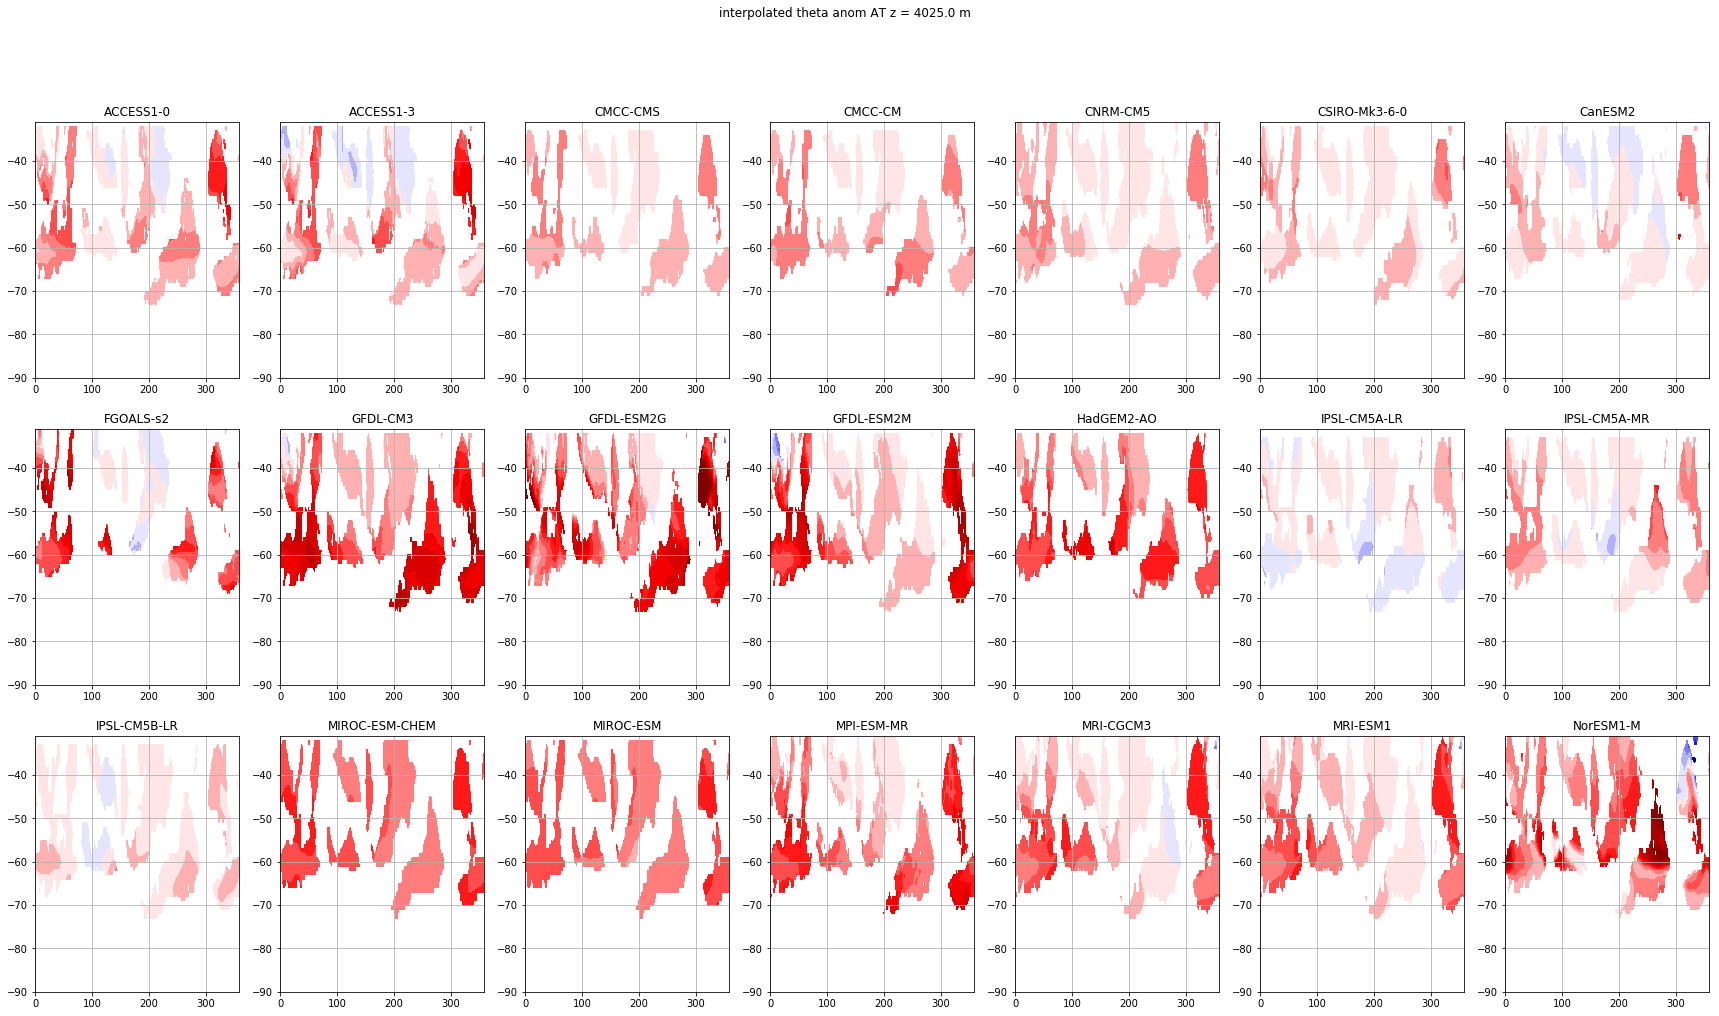

In [64]:
fig = plt.figure() 
fig.set_size_inches(30, 16)

cmap = plt.get_cmap('seismic')
step = 0.1
contf_lvls = np.arange(-1,1+1e-08,step)

lev_unique_for_plot = np.array(lev_unique)
lev_plot = 4000
lev_idx = find_nearest_index(lev_unique, lev_plot)
    
print(lev_idx)
for idx,f in enumerate(good_list):
    plt.subplot(3,7,idx+1)
    
    plt.contourf(lon_unique, lat_unique,
                 thetao_rcp85_unique[:,:,lev_idx,idx] - thetao_hist_unique[:,:,lev_idx,idx], 
                 contf_lvls, cmap=cmap, extend='both')
    plt.title(f)
    plt.grid()
plt.suptitle('interpolated theta anom AT z = ' + str(lev_unique_for_plot[lev_idx]) + ' m')

In [47]:
# Criteria for MMM:
good_tol = 11 # because there are 21 models

thetao_hist_MMM = np.empty((len(lat_unique), len(lon_unique), len(lev_unique)))
thetao_rcp85_MMM = np.empty((len(lat_unique), len(lon_unique), len(lev_unique)))
print(np.shape(thetao_hist_MMM))
tauuo_hist_MMM = np.empty(np.shape(grid_lon_unique))
tauuo_rcp85_MMM = np.empty(np.shape(grid_lon_unique))
tauvo_hist_MMM = np.empty(np.shape(grid_lon_unique))
tauvo_rcp85_MMM = np.empty(np.shape(grid_lon_unique))
for y_idx, y in enumerate(lat_unique):
    print('lat: ' + str(y))
    for x_idx, x in enumerate(lon_unique):
        tauuo_hist_unique_now = tauuo_hist_unique[y_idx][x_idx]
        tauuo_rcp85_unique_now = tauuo_rcp85_unique[y_idx][x_idx]
        
        tauvo_hist_unique_now = tauvo_hist_unique[y_idx][x_idx]
        tauvo_rcp85_unique_now = tauvo_rcp85_unique[y_idx][x_idx]

        tauuo_hist_idx = np.argwhere(np.isnan(tauuo_hist_unique_now))
        if len(tauuo_hist_idx) <= good_tol:
            tauuo_hist_MMM[y_idx, x_idx] = np.nanmean(tauuo_hist_unique_now)
            tauuo_rcp85_MMM[y_idx, x_idx] = np.nanmean(tauuo_rcp85_unique_now)
        else:
            tauuo_hist_MMM[y_idx, x_idx] = np.mean(tauuo_hist_unique_now)
            tauuo_rcp85_MMM[y_idx, x_idx] = np.mean(tauuo_rcp85_unique_now)
            
        tauvo_hist_idx = np.argwhere(np.isnan(tauvo_hist_unique_now))
        if len(tauvo_hist_idx) <= good_tol:
            tauvo_hist_MMM[y_idx, x_idx] = np.nanmean(tauvo_hist_unique_now)
            tauvo_rcp85_MMM[y_idx, x_idx] = np.nanmean(tauvo_rcp85_unique_now)
        else:
            tauvo_hist_MMM[y_idx, x_idx] = np.mean(tauvo_hist_unique_now)
            tauvo_rcp85_MMM[y_idx, x_idx] = np.mean(tauvo_rcp85_unique_now)
            
        for z_idx, z in enumerate(lev_unique):
            thetao_hist_unique_now = thetao_hist_unique[y_idx][x_idx][z_idx]
            thetao_rcp85_unique_now = thetao_rcp85_unique[y_idx][x_idx][z_idx]

            thetao_hist_idx = np.argwhere(np.isnan(thetao_hist_unique_now))
            if len(thetao_hist_idx) <= good_tol:
                thetao_hist_MMM[y_idx, x_idx, z_idx] = np.nanmean(thetao_hist_unique_now)
                thetao_rcp85_MMM[y_idx, x_idx, z_idx] = np.nanmean(thetao_rcp85_unique_now)
            else:
                thetao_hist_MMM[y_idx, x_idx, z_idx] = np.mean(thetao_hist_unique_now)
                thetao_rcp85_MMM[y_idx, x_idx, z_idx] = np.mean(thetao_rcp85_unique_now)

print(np.shape(tauuo_hist_MMM))
print(np.shape(thetao_hist_MMM))


(60, 360, 44)
lat: -90
lat: -89
lat: -88
lat: -87
lat: -86
lat: -85
lat: -84
lat: -83
lat: -82
lat: -81
lat: -80
lat: -79
lat: -78
lat: -77
lat: -76
lat: -75
lat: -74
lat: -73
lat: -72
lat: -71
lat: -70
lat: -69
lat: -68
lat: -67
lat: -66
lat: -65
lat: -64
lat: -63
lat: -62
lat: -61
lat: -60
lat: -59
lat: -58
lat: -57
lat: -56
lat: -55
lat: -54
lat: -53
lat: -52
lat: -51
lat: -50
lat: -49
lat: -48
lat: -47
lat: -46
lat: -45
lat: -44
lat: -43
lat: -42
lat: -41
lat: -40
lat: -39
lat: -38
lat: -37
lat: -36
lat: -35
lat: -34
lat: -33
lat: -32
lat: -31
(60, 360)
(60, 360, 44)


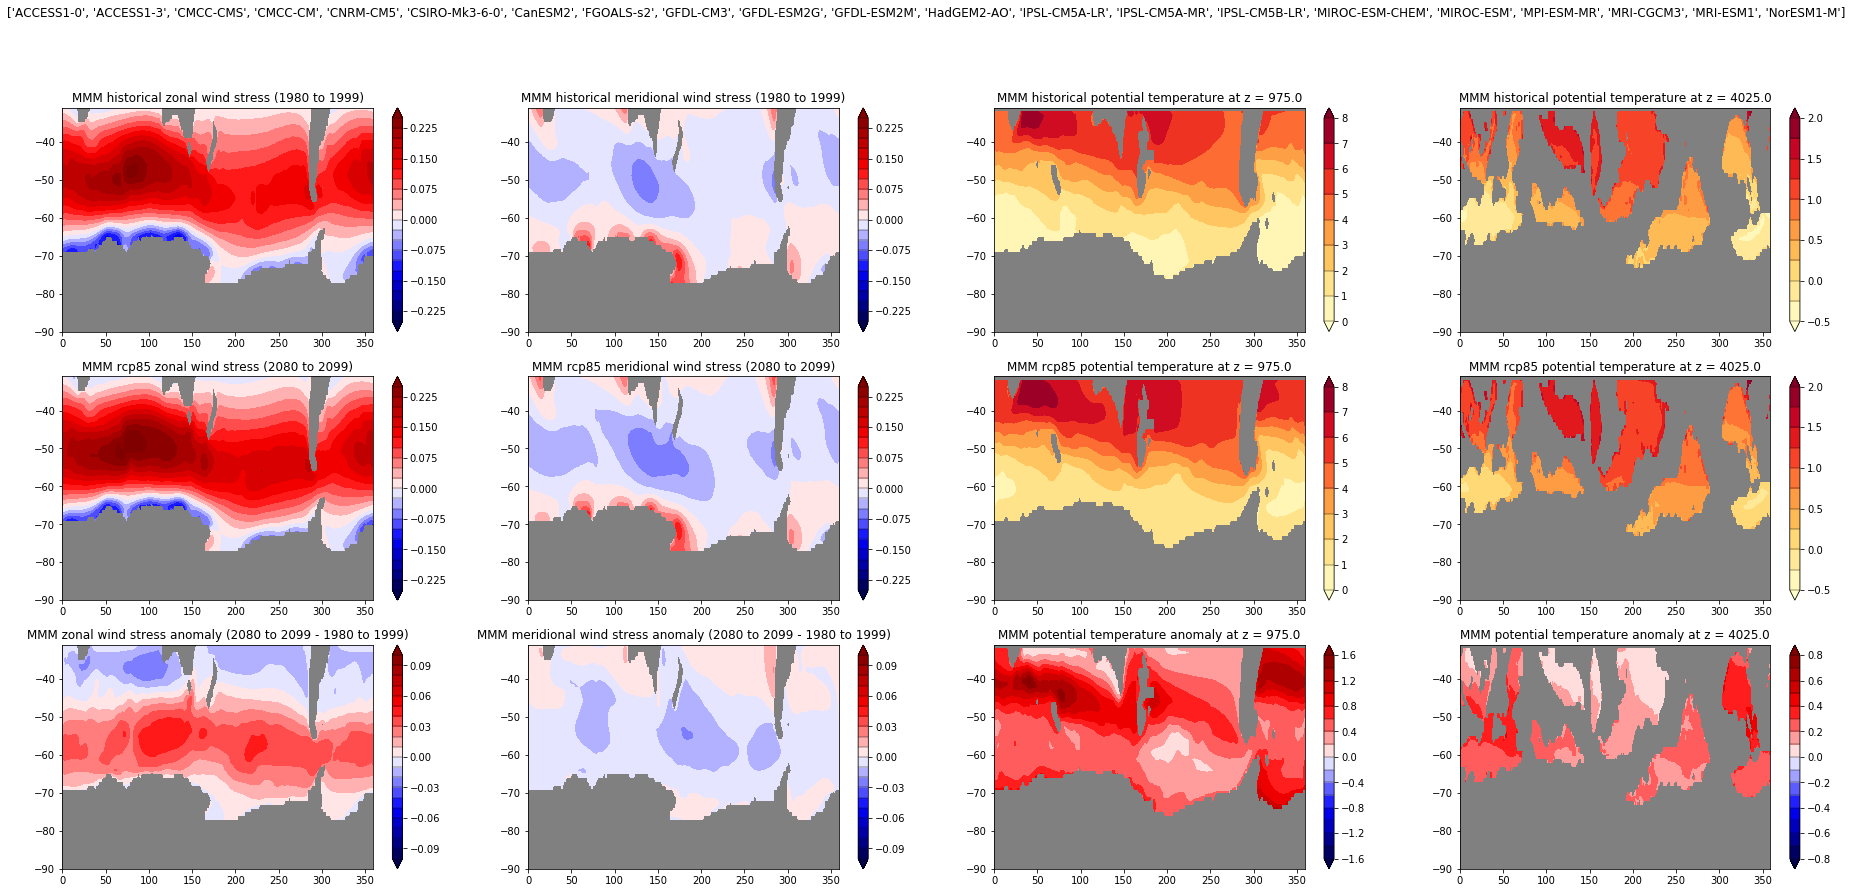

In [77]:
fig = plt.figure() 
fig.set_size_inches(32, 14)

ax = plt.subplot(3,4,1)
ax.set_facecolor('grey')
cmap = plt.get_cmap('seismic')
step = 0.025
contf_lvls = np.arange(-0.25,0.25+1e-08,step)
contf = plt.contourf(lon_unique, lat_unique, tauuo_hist_MMM, 
                     contf_lvls, cmap=cmap, extend='both')
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
plt.title('MMM historical zonal wind stress (1980 to 1999)')

ax = plt.subplot(3,4,5)
ax.set_facecolor('grey')
cmap = plt.get_cmap('seismic')
step = 0.025
contf_lvls = np.arange(-0.25,0.25+1e-08,step)
contf = plt.contourf(lon_unique, lat_unique, tauuo_rcp85_MMM,
                     contf_lvls, cmap=cmap, extend='both')
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
plt.title('MMM rcp85 zonal wind stress (2080 to 2099)')

ax = plt.subplot(3,4,9)
ax.set_facecolor('grey')
cmap = plt.get_cmap('seismic')
step = 0.01
contf_lvls = np.arange(-0.1,0.1+1e-08,step)
contf = plt.contourf(lon_unique, lat_unique, tauuo_rcp85_MMM-tauuo_hist_MMM, 
                     contf_lvls, cmap=cmap, extend='both')
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
plt.title('MMM zonal wind stress anomaly (2080 to 2099 - 1980 to 1999)')




ax = plt.subplot(3,4,2)
ax.set_facecolor('grey')
cmap = plt.get_cmap('seismic')
step = 0.025
contf_lvls = np.arange(-0.25,0.25+1e-08,step)
contf = plt.contourf(lon_unique, lat_unique, tauvo_hist_MMM, 
                     contf_lvls, cmap=cmap, extend='both')
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
plt.title('MMM historical meridional wind stress (1980 to 1999)')

ax = plt.subplot(3,4,6)
ax.set_facecolor('grey')
cmap = plt.get_cmap('seismic')
step = 0.025
contf_lvls = np.arange(-0.25,0.25+1e-08,step)
contf = plt.contourf(lon_unique, lat_unique, tauvo_rcp85_MMM,
                     contf_lvls, cmap=cmap, extend='both')
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
plt.title('MMM rcp85 meridional wind stress (2080 to 2099)')

ax = plt.subplot(3,4,10)
ax.set_facecolor('grey')
cmap = plt.get_cmap('seismic')
step = 0.01
contf_lvls = np.arange(-0.1,0.1+1e-08,step)
contf = plt.contourf(lon_unique, lat_unique, tauvo_rcp85_MMM-tauvo_hist_MMM, 
                     contf_lvls, cmap=cmap, extend='both')
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
plt.title('MMM meridional wind stress anomaly (2080 to 2099 - 1980 to 1999)')





ax = plt.subplot(3,4,3)
ax.set_facecolor('grey')
cmap = plt.get_cmap('YlOrRd')
step = 1
contf_lvls = np.arange(0,8+1e-08,step)
lev_plot = 1000
lev_idx = find_nearest_index(lev_unique_for_plot, lev_plot)
contf = plt.contourf(lon_unique, lat_unique, thetao_hist_MMM[:,:,lev_idx] - 273.15,
                     contf_lvls, cmap=cmap, extend='both')
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
plt.title('MMM historical potential temperature at z = ' + str(lev_unique_for_plot[lev_idx]))

ax = plt.subplot(3,4,7)
ax.set_facecolor('grey')
cmap = plt.get_cmap('YlOrRd')
step = 1
contf_lvls = np.arange(0,8+1e-08,step)
lev_plot = 1000
lev_idx = find_nearest_index(lev_unique_for_plot, lev_plot)
contf = plt.contourf(lon_unique, lat_unique, thetao_rcp85_MMM[:,:,lev_idx] - 273.15,
                     contf_lvls, cmap=cmap, extend='both')
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
plt.title('MMM rcp85 potential temperature at z = ' + str(lev_unique_for_plot[lev_idx]))

ax = plt.subplot(3,4,11)
ax.set_facecolor('grey')
cmap = plt.get_cmap('seismic')
step = 0.2
contf_lvls = np.arange(-1.6,1.6+1e-08,step)
lev_plot = 1000
lev_idx = find_nearest_index(lev_unique_for_plot, lev_plot)
contf = plt.contourf(lon_unique, lat_unique, thetao_rcp85_MMM[:,:,lev_idx]-thetao_hist_MMM[:,:,lev_idx],
                     contf_lvls, cmap=cmap, extend='both')
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
plt.title('MMM potential temperature anomaly at z = ' + str(lev_unique_for_plot[lev_idx]))





ax = plt.subplot(3,4,4)
ax.set_facecolor('grey')
cmap = plt.get_cmap('YlOrRd')
step = 0.25
contf_lvls = np.arange(-0.5,2+1e-08,step)
lev_plot = 4000
lev_idx = find_nearest_index(lev_unique_for_plot, lev_plot)
contf = plt.contourf(lon_unique, lat_unique, thetao_hist_MMM[:,:,lev_idx] - 273.15,
                     contf_lvls, cmap=cmap, extend='both')
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
plt.title('MMM historical potential temperature at z = ' + str(lev_unique_for_plot[lev_idx]))

ax = plt.subplot(3,4,8)
ax.set_facecolor('grey')
cmap = plt.get_cmap('YlOrRd')
step = 0.25
contf_lvls = np.arange(-0.5,2+1e-08,step)
lev_plot = 4000
lev_idx = find_nearest_index(lev_unique_for_plot, lev_plot)
contf = plt.contourf(lon_unique, lat_unique, thetao_rcp85_MMM[:,:,lev_idx] - 273.15,
                     contf_lvls, cmap=cmap, extend='both')
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
plt.title('MMM rcp85 potential temperature at z = ' + str(lev_unique_for_plot[lev_idx]))

ax = plt.subplot(3,4,12)
ax.set_facecolor('grey')
cmap = plt.get_cmap('seismic')
step = 0.1
contf_lvls = np.arange(-0.8,0.8+1e-08,step)
lev_plot = 4000
lev_idx = find_nearest_index(lev_unique_for_plot, lev_plot)
contf = plt.contourf(lon_unique, lat_unique, thetao_rcp85_MMM[:,:,lev_idx]-thetao_hist_MMM[:,:,lev_idx],
                     contf_lvls, cmap=cmap, extend='both')
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
plt.title('MMM potential temperature anomaly at z = ' + str(lev_unique_for_plot[lev_idx]))



plt.suptitle(good_list)

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)

plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig1_' + '.png', bbox_inches='tight', dpi=300)


In [185]:
f = nc4.Dataset('/Users/earl/Desktop/bamboo/MMM/tauuo_rcp85-hist_test.nc','w', format='NETCDF4') #'w' stands for write
#tempgrp = f.createGroup('Temp_data')
f.createDimension('lon', len(lon_unique))
longitude = f.createVariable('Longitude', 'f4', 'lon')
longitude[:] = lon_unique

#f.createDimension('lat', len(lat_unique))
#latitude = f.createVariable('Latitude', 'f4', 'lat')
#latitude[:] = lat_unique

#tauuo = f.createVariable('Wind stress', 'f4', ('time', 'lat', 'lon'))
#tauuo[0,:,:] = tauuo_anom_MMM
#tauuo.units = 'N/m2'

f.close()

#tempgrp.createDimension('lat', len(lat_unique))
## tempgrp.createDimension('z', len(lev_unique))
#tempgrp.createDimension('time', None)
#latitude = tempgrp.createVariable('Latitude', 'f4', 'lat')  
## levels = tempgrp.createVariable('Levels', 'i4', 'z')
## temp = tempgrp.createVariable('Temperature', 'f4', ('time', 'z', 'lat', 'lon'))
#tauuo = tempgrp.createVariable('Wind stress', 'f4', ('time', 'lat', 'lon'))
#time = tempgrp.createVariable('Time', 'i4', 'time')

#longitude[:] = lon_unique #The "[:]" at the end of the variable instance is necessary
#latitude[:] = lat_unique
## levels[:] = lev_unique
## temp[0,:,:,:] = tauuo_anom_MMM
#tauuo[0,:,:] = tauuo_anom_MMM

#get time in days since Jan 01,01
# from datetime import datetime
# today = datetime.today()
# time_num = today.toordinal()
# time[0] = time_num

PermissionError: [Errno 13] Permission denied: b'/Users/earl/Desktop/bamboo/MMM/tauuo_rcp85-hist_test.nc'

In [79]:
of='/Users/earl/Desktop/bamboo/MMM/lat_unique.npy'
a=np.save(of,lat_unique)
of='/Users/earl/Desktop/bamboo/MMM/lon_unique.npy'
a=np.save(of,lon_unique)
of='/Users/earl/Desktop/bamboo/MMM/lev_unique.npy'
a=np.save(of,lev_unique_for_plot)

of='/Users/earl/Desktop/bamboo/MMM/tauuo_hist.npy'
a=np.save(of,tauuo_hist_MMM)
of='/Users/earl/Desktop/bamboo/MMM/tauuo_rcp85.npy'
a=np.save(of,tauuo_rcp85_MMM)
of='/Users/earl/Desktop/bamboo/MMM/tauuo_rcp85-hist.npy'
a=np.save(of,tauuo_rcp85_MMM-tauuo_hist_MMM)

of='/Users/earl/Desktop/bamboo/MMM/tauvo_hist.npy'
a=np.save(of,tauvo_hist_MMM)
of='/Users/earl/Desktop/bamboo/MMM/tauvo_rcp85.npy'
a=np.save(of,tauvo_rcp85_MMM)
of='/Users/earl/Desktop/bamboo/MMM/tauvo_rcp85-hist.npy'
a=np.save(of,tauvo_rcp85_MMM-tauvo_hist_MMM)

of='/Users/earl/Desktop/bamboo/MMM/thetao_hist.npy'
a=np.save(of,thetao_hist_MMM)
of='/Users/earl/Desktop/bamboo/MMM/thetao_rcp85.npy'
a=np.save(of,thetao_rcp85_MMM)
of='/Users/earl/Desktop/bamboo/MMM/thetao_rcp85-hist.npy'
a=np.save(of,thetao_rcp85_MMM-thetao_hist_MMM)
